<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/METODOGALERKIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ERICK VALDEZ SALLAGOS**

**METODO DE GALERKIN**\
Una solucion aproximada para\
**$-u''+u-x=0$**\
Con condiciones: \
$u(0)=u(1)=0$. Utilice: \
$u_3 = \sum  α_i β_i(x) $\
con $𝝓_i(x) = seniβx $\
apropiadas a las constantes $\alpha_i$

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

**SOLUCION ANALITICA**

In [55]:
x = sp.symbols('x') # introducimos una variable
u = sp.Function('u') # esto es una función

In [56]:
ode = u(x).diff(x, x) + u(x) + x
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) - x)

RESOLVIENDO LA ECUACION

In [57]:
ode = -u(x).diff(x, 2) + u(x) - x

In [58]:
sol

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

Aplicar las condiciones

In [59]:
C1, C2 = sp.symbols('C1 C2')
sol_expr = sol_general.rhs

# Sustituir condiciones
eq1 = sol_expr.subs(x, 0)
eq2 = sol_expr.subs(x, 1)

Resolviendo para las constantes

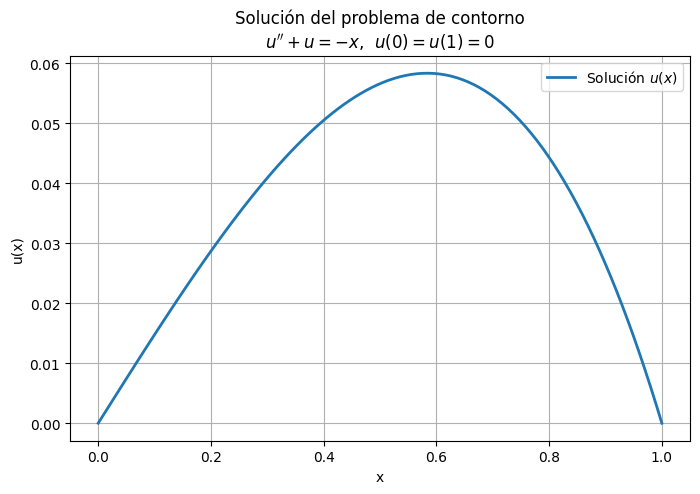

In [60]:
# Convertimos en un arreglo de numpy
u_expr = sol.rhs

# Sustituir las constantes C1 y C2 en u_expr
# Aseguramos que C1 y C2 son símbolos de SymPy
C1, C2 = sp.symbols('C1 C2')
# Usamos el diccionario 'constants' del estado del kernel para la sustitución
u_expr_numerical = u_expr.subs({C1: constants[C1], C2: constants[C2]})

u_num = sp.lambdify(x, u_expr_numerical, "numpy")

#################
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$u'' + u = -x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

**METODO DE GALERKIN**

In [61]:
print("\n" + "=" * 70)
print("2. MÉTODO DE GALERKIN CON β_i(x) = sin(iπx)")
print("=" * 70)

# Definir las funciones base β_i(x) = sin(iπx)
def beta(i, x_val):
    """Función base β_i(x) = sin(iπx)"""
    return np.sin(i * np.pi * x_val)

# Número de funciones base a usar
N = 3
print("Funciones base utilizadas:")
for i in range(1, N+1):
    print(f"β_{i}(x) = sin({i}πx)")


2. MÉTODO DE GALERKIN CON β_i(x) = sin(iπx)
Funciones base utilizadas:
β_1(x) = sin(1πx)
β_2(x) = sin(2πx)
β_3(x) = sin(3πx)


SISTEMA LINEAL

In [62]:
# Construir el sistema lineal para los coeficientes α_i
# La aproximación es: u_3(x) = Σ_{i=1}^3 α_i * β_i(x)
# El residual es: R(x) = -u'' + u - x

# Matriz del sistema K (3x3) y vector F (3x1)
K = np.zeros((N, N))
F = np.zeros(N)

print("\nCalculando elementos de la matriz K y vector F...")
# Calcular integrales simbólicamente
for i in range(N):  # i indexa β_i (pero i=0 corresponde a β_1)
    for j in range(N):  # j indexa β_j (pero j=0 corresponde a β_1)
        # Elemento K_ij = ∫₀¹ [β_i''(x) * β_j(x) + β_i(x) * β_j(x)] dx
        # Nota: -u'' contribuye con +β_i''*β_j (por el signo negativo)

        # Calcular simbólicamente
        i_idx = i + 1  # β_i con i=1,2,3
        j_idx = j + 1  # β_j con j=1,2,3

        # Segunda derivada: d²/dx²[sin(iπx)] = -(iπ)² sin(iπx)
        beta_i_double_prime = -(i_idx * sp.pi)**2 * sp.sin(i_idx * sp.pi * x)

        # Producto β_i'' * β_j
        term1 = beta_i_double_prime * sp.sin(j_idx * sp.pi * x)

        # Producto β_i * β_j
        term2 = sp.sin(i_idx * sp.pi * x) * sp.sin(j_idx * sp.pi * x)

        # Integral de 0 a 1
        K[i, j] = sp.integrate(term1 + term2, (x, 0, 1))
         # Elemento F_i = ∫₀¹ x * β_i(x) dx
    F[i] = sp.integrate(x * sp.sin((i+1) * sp.pi * x), (x, 0, 1))

# Convertir a float
K = np.array(K, dtype=float)
F = np.array(F, dtype=float)

print("\nMatriz del sistema K:")
print(K)
print("\nVector F:")
print(F)



Calculando elementos de la matriz K y vector F...

Matriz del sistema K:
[[ -4.4348022   0.          0.       ]
 [  0.        -19.2392088   0.       ]
 [  0.          0.        -43.9132198]]

Vector F:
[ 0.31830989 -0.15915494  0.1061033 ]


ENCONTRAR $α_i$

In [63]:
alpha = np.linalg.solve(K, F)

print("\nCoeficientes α_i obtenidos:")
for i in range(N):
    print(f"α_{i+1} = {alpha[i]:.10f}")

# Función de aproximación usando β_i
def u_approx(x_vals):
    """Aproximación por el método de Galerkin: u_3(x) = Σ α_i * β_i(x)"""
    result = np.zeros_like(x_vals)
    for i in range(N):
        result += alpha[i] * beta(i+1, x_vals)  # i+1 porque β_1, β_2, β_3
    return result


Coeficientes α_i obtenidos:
α_1 = -0.0717754416
α_2 = 0.0082724266
α_3 = -0.0024162040


**Grafica Solucion Galerkin vs Solucion exacta**


3. COMPARACIÓN GRÁFICA


(0.0, 1.0)

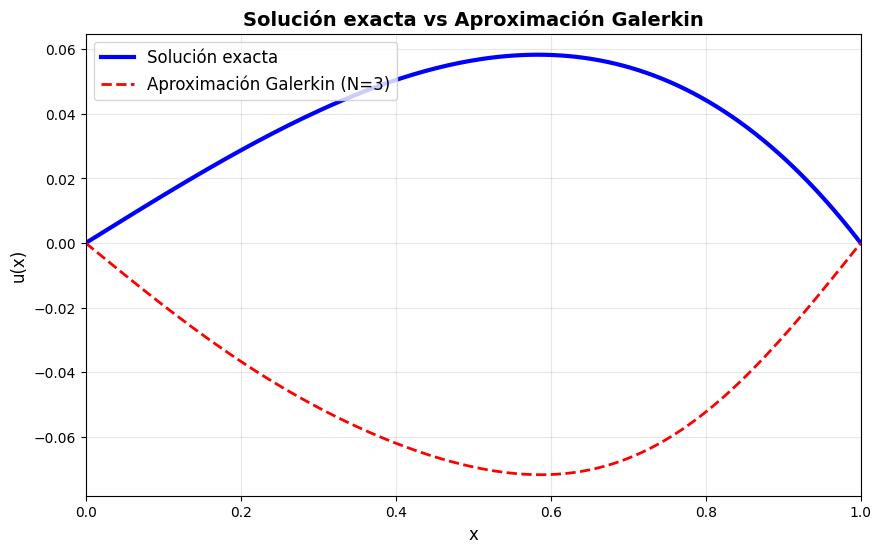

In [64]:
print("\n" + "=" * 70)
print("3. COMPARACIÓN GRÁFICA")
print("=" * 70)

# Puntos para evaluación
xx = np.linspace(0, 1, 200)
yy_exact = u_exact(xx)
yy_approx = u_approx(xx)


# Crear figura con un solo subgráfico
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Gráfico 1: Ambas soluciones
ax1.plot(xx, yy_exact, 'b-', linewidth=3, label='Solución exacta')
ax1.plot(xx, yy_approx, 'r--', linewidth=2, label=f'Aproximación Galerkin (N={N})')

ax1.set_title('Solución exacta vs Aproximación Galerkin', fontsize=14, fontweight='bold')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('u(x)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12, loc='upper left')
ax1.set_xlim([0, 1])

**CALCULO DEL ERROR**

In [65]:

# Error cuadrático medio (MSE)
mse = np.mean((yy_exact - yy_approx)**2)

# Error máximo
max_error = np.max(error_abs)

# Error promedio
mean_error = np.mean(error_abs)

# Error L2 relativo
l2_norm_exact = np.sqrt(np.trapz(yy_exact**2, xx))
l2_norm_error = np.sqrt(np.trapz((yy_exact - yy_approx)**2, xx))
relative_l2_error = l2_norm_error / l2_norm_exact

print(f"Error cuadrático medio (MSE): {mse:.6e}")
print(f"Error máximo: {max_error:.6e}")
print(f"Error promedio: {mean_error:.6e}")
print(f"Error L2 relativo: {relative_l2_error:.6e}")

Error cuadrático medio (MSE): 8.593943e-03
Error máximo: 1.300889e-01
Error promedio: 8.366679e-02
Error L2 relativo: 2.221869e+00


/tmp/ipython-input-2118508284.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  l2_norm_exact = np.sqrt(np.trapz(yy_exact**2, xx))
/tmp/ipython-input-2118508284.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  l2_norm_error = np.sqrt(np.trapz((yy_exact - yy_approx)**2, xx))


COMPARACION

In [66]:
# Puntos específicos para comparación
points = [0.0, 0.25, 0.5, 0.75, 1.0]
print(f"{'x':<10} {'Exacta':<20} {'Aproximada':<20} {'Error':<20}")
print("-" * 70)

for pt in points:
    exact_val = u_exact(pt)
    approx_val = u_approx(np.array([pt]))[0]
    error_val = np.abs(exact_val - approx_val)
    print(f"{pt:<10.2f} {exact_val:<20.10f} {approx_val:<20.10f} {error_val:<20.10f}")


x          Exacta               Aproximada           Error               
----------------------------------------------------------------------
0.00       -0.0000000000        0.0000000000         0.0000000000        
0.25       0.0350476002         -0.0441889890        0.0792365892        
0.50       0.0565905580         -0.0693592376        0.1259497956        
0.75       0.0502757856         -0.0607338423        0.1110096279        
1.00       0.0000000000         -0.0000000000        0.0000000000        


**GRAFICA DE LAS FUNCIONES**

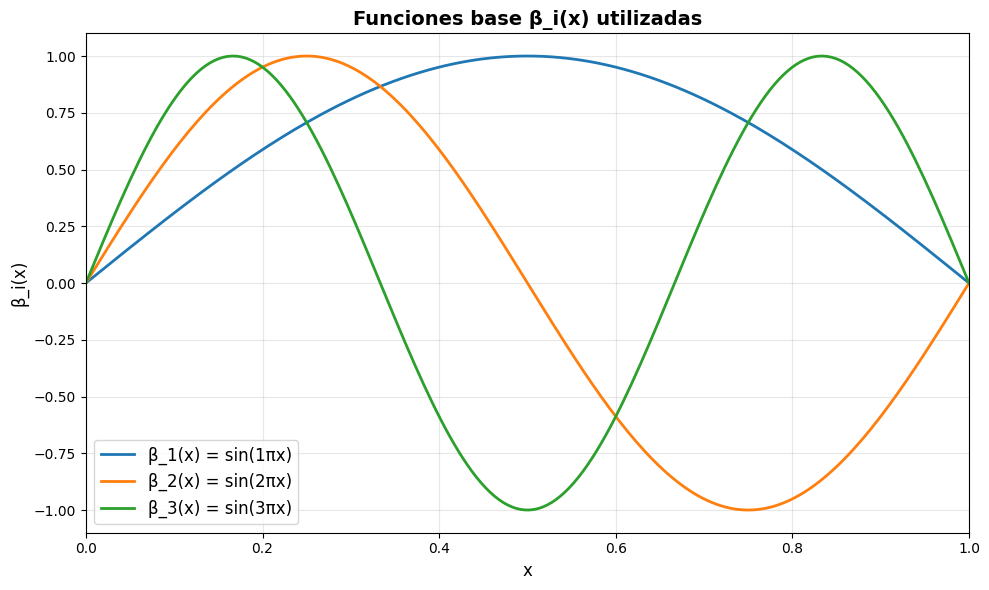

In [67]:
# Gráfica de las funciones base β_i(x)
plt.figure(figsize=(10, 6))
for i in range(1, N+1):
    plt.plot(xx, beta(i, xx), label=f'β_{i}(x) = sin({i}πx)', linewidth=2)

plt.title('Funciones base β_i(x) utilizadas', fontsize=14, fontweight='bold')
plt.xlabel('x', fontsize=12)
plt.ylabel('β_i(x)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xlim([0, 1])
plt.tight_layout()
plt.show()